In [305]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import stats
import math

[width, height] = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [width*2, height*2]

In [490]:
def sigmoid(x, k, x_0, L):
    return L / (1.0 + np.exp(-k * (x_0 - x)))

def exp_rolloff(x_vals, a, b, c):
    return c - a * np.exp(b * x_vals)

class CurveFit(object):
    '''
    Simple container to hold results of curve fit
    '''
    def __init__(self, x_vals, y_vals, model_fn, init_params):
        
        # Store x and y points
        self.x_vals = x_vals
        self.y_vals = y_vals
        
        # Fit the data
        self.params, self.pcov = optimize.curve_fit(model_fn, x_vals, y_vals, init_params)

        # Calculate the standard deviation of fitted parameters from covariance matrix
        self.perr = np.sqrt(np.diag(self.pcov))

        # Calculate expected values based on fit
        self.y_fit = model_fn(x_vals, *self.params)

        # Calculate reduced chi-squared
        self.ndof = len(y_vals) - len(init_params)
        self.chisq_dof = stats.chisquare(y_vals, self.y_fit).statistic / self.ndof

    def print_result(self, prefix=None):
        
        # Print fit results
        if prefix:
            print('{} fit results:'.format(prefix))
        else:
            print("Fit results:")
            
        for i, (param, err) in enumerate(zip(self.params, self.perr)):
            print('{:d} {:7.2f} +/- {:5.2f}'.format(i, param, err))
        print('Chi^2/dof = {:.2f}'.format(self.chisq_dof))
        print('')
        
    def plot_fit(self, colour, label_txt=None):
        
        label=r'$\chi^2$={:.2f}/dof'.format(self.chisq_dof)
        if label_txt is not None:
            label = r'{}, {}'.format(label_txt, label)
        plt.plot(self.x_vals, self.y_fit, c=colour, label=label)

In [463]:
# Define x values
num_vals = 32
x_vals = np.linspace(0, 31, num_vals)

Noisy data fit results:
0    0.90 +/-  0.22
1   28.14 +/-  0.29
2 1014.60 +/- 22.45
Chi^2/dof = 28.56



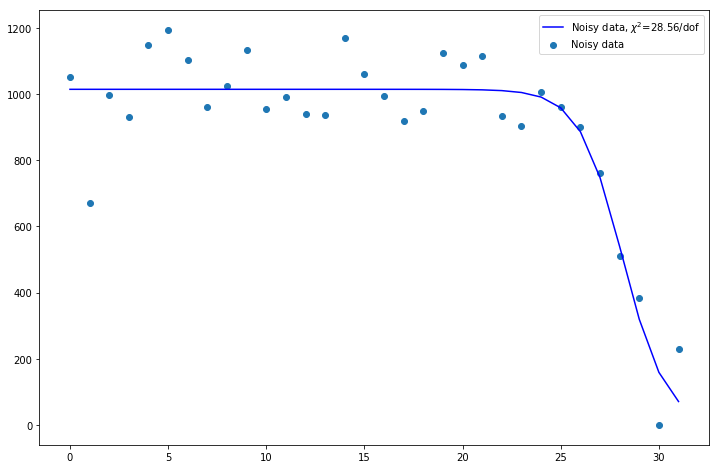

In [494]:
# Calculate test y values based on a sigmoid with normally distributed noise overlaid
L = 1000.0
x_0 = 28
k = 1.0
noise_scale=100.0
y_vals = sigmoid(x_vals, k, x_0, L) + np.random.normal(scale=noise_scale, size=num_vals)
y_vals[y_vals < 0] = 0.0

# Fit the data
noisy_sigmoid = CurveFit(x_vals, y_vals, sigmoid, [1.1, 28.0, 1900.])

# Plot the data and the fit
plt.scatter(x_vals, y_vals, label='Noisy data')
noisy_sigmoid.print_result("Noisy data")
noisy_sigmoid.plot_fit('b', 'Noisy data')
_ = plt.legend(loc='best')

In [472]:
# Define good, bad and average (mean good) tile data based on Emma's analysis

good_tile = np.array([
    1999.7598957519533, 2012.1985307459677, 2011.9058067708331, 2010.050983836207, 
    2007.5549291294644, 2005.4957702546296, 2002.5917001201922, 1998.8542800000002, 
    1994.6954931640623, 1990.6695954483696, 1984.2093352272727, 1977.1766495535717, 
    1970.6983476562498, 1962.310412006579, 1953.0224539930557, 1942.8633901654412, 
    1928.6008535156252, 1912.4385437499998, 1897.3458950892857, 1879.1023593749999, 
    1855.7521432291667, 1828.4664048295454, 1792.93533203125, 1748.6996336805557, 
    1694.6302597656252, 1631.2685479910713, 1556.855149739583, 1456.2420765625, 
    1330.8011210937502, 1069.6829739583334, 697.23783203125, 537.905484375])
bad_tile = np.array([
    1714.6353239746095, 1720.5363248487904, 1728.5771809895834, 1725.2867931034482, 
    1732.8210845424107, 1729.0055749421297, 1736.41816796875, 1732.4778540624998, 
    1740.3330283203125, 1735.110336956522, 1744.039004971591, 1737.6789561011906, 
    1745.9852609375, 1738.0119954769739, 1747.0429565972222, 1738.8030303308824, 
    1748.9138520507813, 1739.227815104167, 1749.9661222098216, 1737.4809597355768, 
    1749.0937578125001, 1734.3747578125, 1743.1031515625, 1717.6107803819443, 
    1727.6436250000002, 1699.064095982143, 1712.5375924479165, 1668.6529531249998, 
    1650.75973828125, 1451.9381380208333, 1271.99217578125, 902.6060781250001])
average_good_tiles=np.array([
    2201.880206298828, 2208.1360889616935, 2206.0213638020837, 2203.236448545259, 
    2200.443798549107, 2196.925404513889, 2192.782999699519, 2189.180180625, 
    2185.162751302083, 2180.75758423913, 2176.2895589488635, 2171.585120907738, 
    2166.923972265625, 2161.5723281250002, 2155.486689670139, 2150.0766806066176, 
    2142.984539550781, 2134.4686317708333, 2124.9220195312496, 2114.7513900240383, 
    2102.6824973958333, 2088.420909090909, 2071.99846015625, 2052.2701085069443, 
    2028.4678037109375, 2001.8389988839283, 1970.2318958333333, 1931.7497921875001, 
    1847.5074843749999, 1633.0741171874997, 1315.84805078125, 1089.5188125])


Good tile exponential fit results:
0    1.04 +/-  0.25
1    0.23 +/-  0.01
2 1992.99 +/-  8.34
Chi^2/dof = 1.01

Good tile sigmoid fit results:
0    0.40 +/-  0.02
1   29.11 +/-  0.14
2 1967.14 +/- 12.67
Chi^2/dof = 2.52

Bad tile exponential fit results:
0    0.00 +/-  0.00
1    0.61 +/-  0.02
2 1737.35 +/-  2.97
Chi^2/dof = 0.14

Bad tile sigmoid fit results:
0    0.84 +/-  0.03
1   31.12 +/-  0.04
2 1735.08 +/-  2.77
Chi^2/dof = 0.13



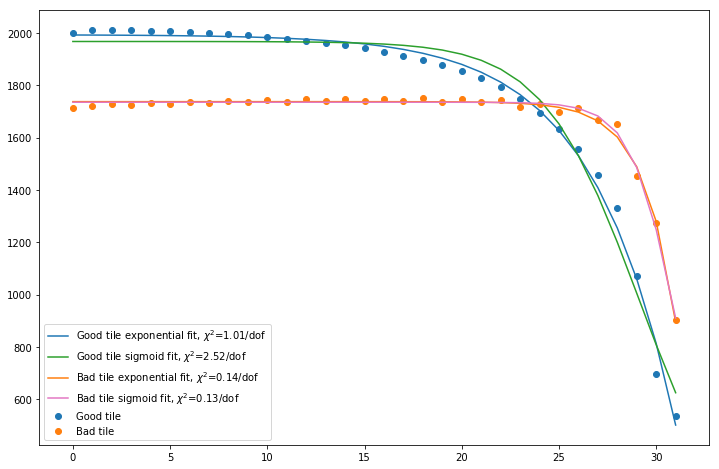

In [492]:
# Plot good and bad data, fit both exponential rolloff and sigmoid to both
plt.scatter(x_vals, good_tile, c='tab:blue', label='Good tile')
plt.scatter(x_vals, bad_tile, c='tab:orange', label='Bad tile')

good_exp = CurveFit(x_vals, good_tile, exp_rolloff, [1, 1, 2000])
good_exp.print_result('Good tile exponential')
good_exp.plot_fit('tab:blue', 'Good tile exponential fit')

good_sig = CurveFit(x_vals, good_tile, sigmoid, [3, 5, 1900])
good_sig.print_result('Good tile sigmoid')
good_sig.plot_fit('tab:green', 'Good tile sigmoid fit')

bad_exp = CurveFit(x_vals, bad_tile, exp_rolloff, [1, 1, 1700])
bad_exp.print_result('Bad tile exponential')
bad_exp.plot_fit('tab:orange', 'Bad tile exponential fit')

bad_sig = CurveFit(x_vals, bad_tile, sigmoid, [3, 5, 1700])
bad_sig.print_result('Bad tile sigmoid')
bad_sig.plot_fit('tab:pink', 'Bad tile sigmoid fit')

_ = plt.legend(loc='best')

Good tile average, exponential: fit results:
0    0.04 +/-  0.02
1    0.33 +/-  0.02
2 2171.20 +/-  7.79
Chi^2/dof = 0.64

Good tile average, sigmoid: fit results:
0    0.47 +/-  0.03
1   31.13 +/-  0.13
2 2161.38 +/-  8.86
Chi^2/dof = 0.89



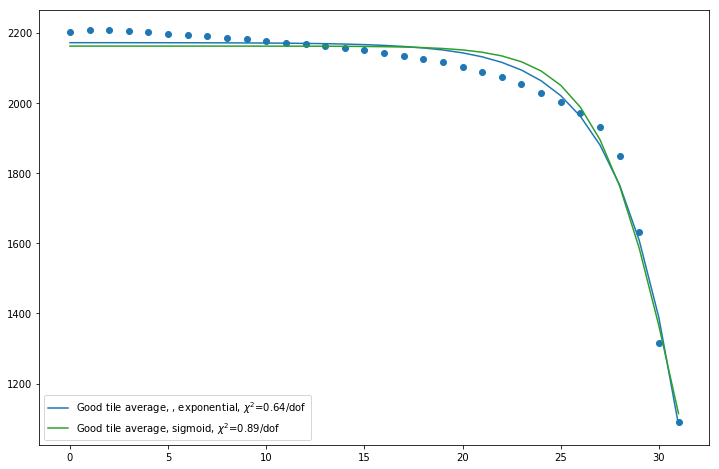

In [488]:
plt.scatter(x_vals, average_good_tiles)
avtile_exp = CurveFit(x_vals, average_good_tiles, exp_rolloff, [1, 1, 2000])
avtile_exp.print_result('Good tile average, exponential')
avtile_exp.plot_fit('tab:blue', 'Good tile average, , exponential')
avtile_sig = CurveFit(x_vals, average_good_tiles, sigmoid, [3, 5, 2000])
avtile_sig.print_result('Good tile average, sigmoid')
avtile_sig.plot_fit('tab:green', 'Good tile average, sigmoid')
_ = plt.legend()